In [1]:
import pandas as pd

df= pd.read_csv('Wedding_Planners_Cleaned.csv')
df

,Name,Location,Price_onwards,Decorators_type,Ratings,Review_counts,City,Price_category
0,tatva event planner,baner,250000.0,inhouse & outside decorators,5.0,12,pune,high
1,prayukti events,pune,200000.0,inhouse & outside decorators,4.7,19,pune,high
2,urban events,kalyani nagar,250000.0,inhouse & outside decorators,4.9,16,pune,high
3,gātha - a tale of events,koregaon park,200000.0,inhouse & outside decorators,4.9,58,pune,high
4,happy wedz,sinhagad road,49999.0,inhouse & outside decorators,5.0,106,pune,low
...,...,...,...,...,...,...,...,...
1195,str events and wedding planners,abids,200000.0,inhouse & outside decorators,5.0,0,hyderabad,high
1196,rs media house,hyderabad,200000.0,inhouse & outside decorators,5.0,0,hyderabad,high
1197,sri laxmi balaji event planner,abids,200000.0,inhouse & outside decorators,5.0,0,hyderabad,high
1198,brindha events,shamshabad,200000.0,inhouse decorators only,5.0,0,hyderabad,high


# Univariate Analysis

## 1. Ratings Distribution (Histogram / KDE)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

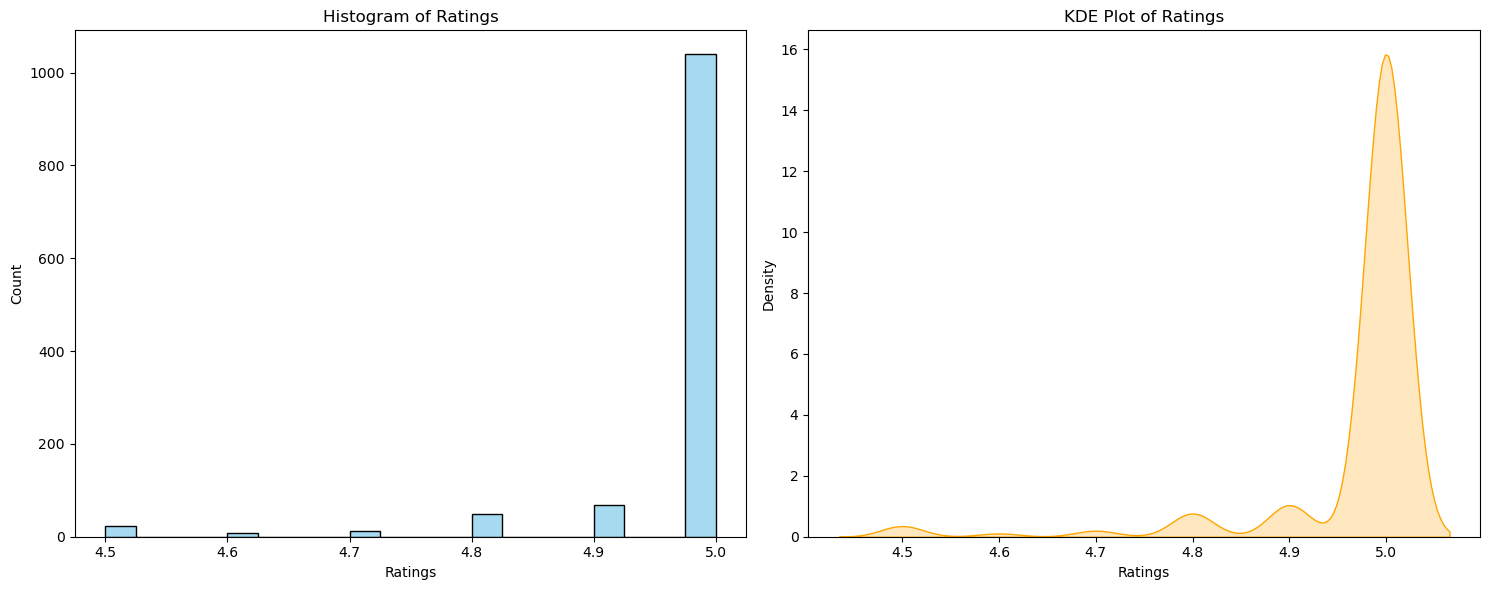

In [142]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.histplot(df['Ratings'], ax=axes[0], bins=20, color='Skyblue')
axes[0].set_title('Histogram of Ratings')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Count')

sns.kdeplot(df['Ratings'], ax=axes[1], color='Orange', fill=True)
axes[1].set_title('KDE Plot of Ratings')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Density')

plt.savefig('Ratings.png')
plt.tight_layout()
plt.show()

#### Ratings Distribution
What the chart shows

Histogram showing how planner ratings are spread.

`Interpretation`

Most planners fall in the mid-to-high rating range.

Very few low-rated planners exist.

This shows that overall service quality in the market is strong.

You can say

“The majority of vendors are rated favorably, indicating that customers generally have satisfying experiences with wedding planners.”

## 2. Price Range Distribution (Histogram / Box Plot)

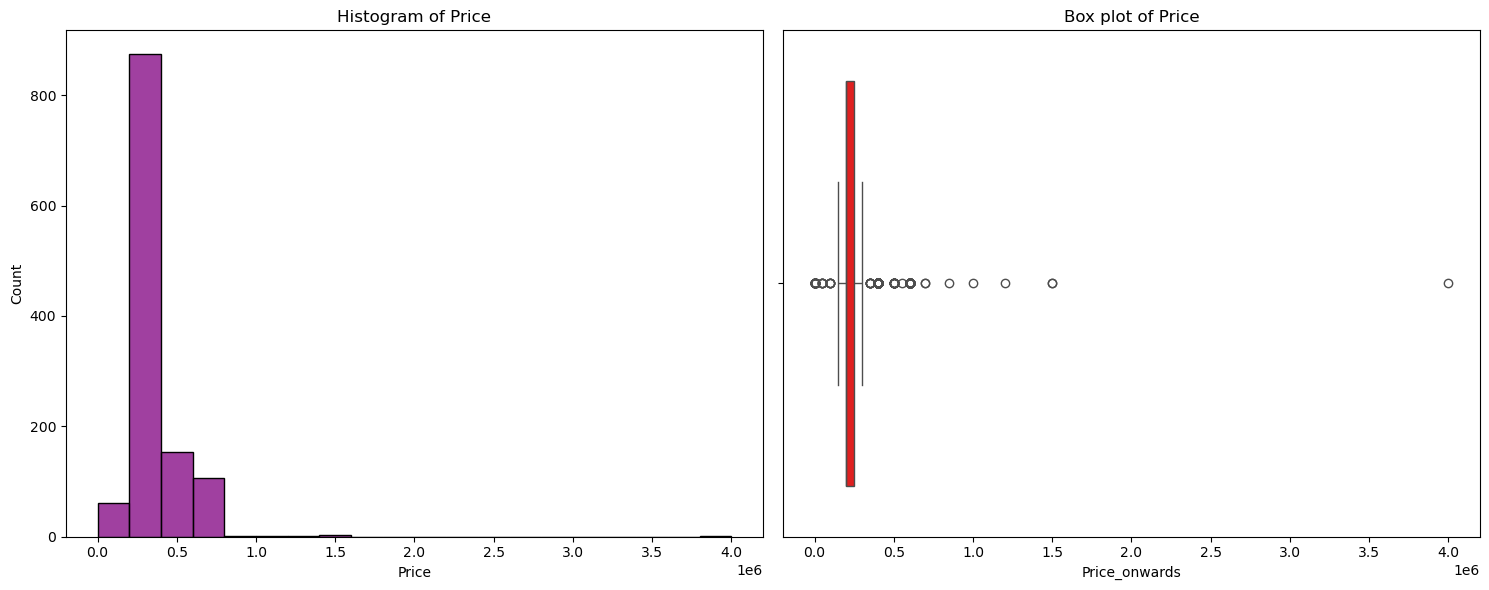

In [143]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.histplot(df['Price_onwards'], ax=axes[0], bins=20, color='Purple')
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Count')

sns.boxplot(x=df['Price_onwards'], ax=axes[1], color='red')
axes[1].set_title('Box plot of Price')
# axes[1].set_xlabel('Price')

plt.savefig('Price.png')
plt.tight_layout()
plt.show()

#### Price Distribution
What the chart shows

Histogram of planner pricing.

`Interpretation`

Pricing is mostly concentrated at lower-to-mid values.

Only a few planners charge premium prices.

This reflects:

A budget-sensitive market

Customers choosing affordable decorators more often

Presentation line

“The market is moderately priced, with only a small segment charging premium rates.”

## 3. Decorators Type

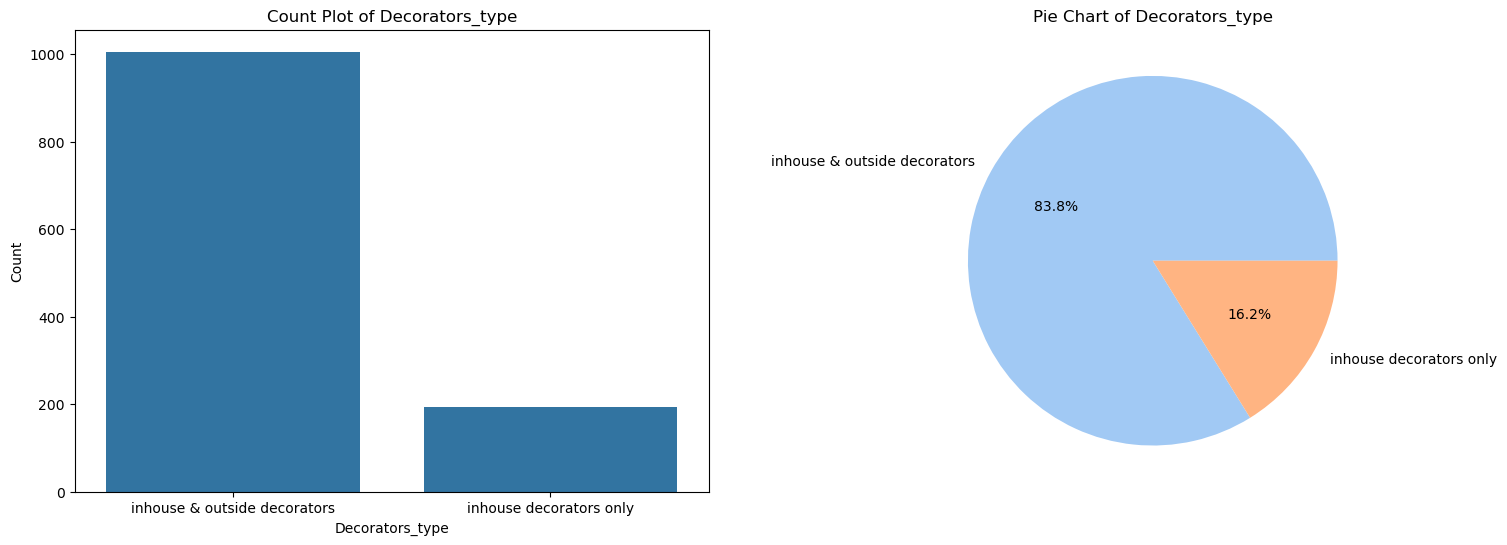

In [144]:
# Example: assuming df['Location'] exists
# Count frequencies
Decorators_count = df['Decorators_type'].value_counts()

fig, axes = plt.subplots(1,2, figsize=(18,6))

# 1️. Count Plot
sns.countplot(x='Decorators_type', data=df, ax=axes[0])
axes[0].set_title('Count Plot of Decorators_type')
axes[0].set_xlabel('Decorators_type')
axes[0].set_ylabel('Count')
# axes[0].tick_params(axis='x', rotation=90)

# 2️. Pie Chart
axes[1].pie(Decorators_count.values, labels=Decorators_count.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[1].set_title('Pie Chart of Decorators_type')

plt.savefig('Decor.png')
plt.show()

## 4. Price Category

In [50]:
df['Price_category'].value_counts()

Price_category
high       868
premium    273
unknown     38
medium      12
low          9
Name: count, dtype: int64

In [53]:
df['Price_onwards'].value_counts()

Price_onwards
200000.0     605
250000.0     238
400000.0     133
600000.0     105
0.0           38
300000.0      22
500000.0      19
150000.0       7
350000.0       7
100000.0       5
50000.0        3
2.0            2
1500000.0      2
700000.0       2
49999.0        1
180000.0       1
1000000.0      1
1200000.0      1
7.0            1
4000000.0      1
1.0            1
275000.0       1
49997.0        1
550000.0       1
850000.0       1
299999.0       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Price_category')

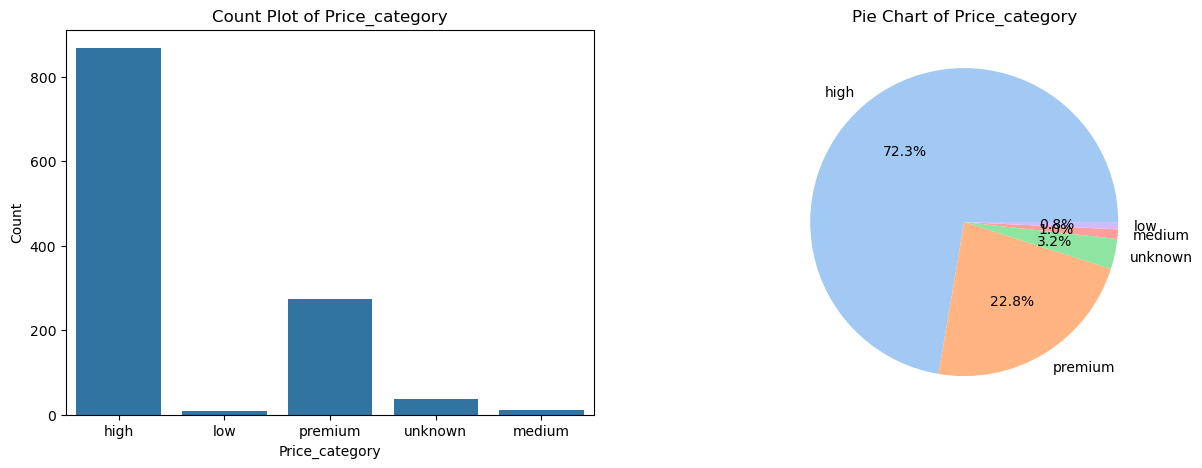

In [44]:
# Example: assuming df['Location'] exists
# Count frequencies
Pcat_count = df['Price_category'].value_counts()

# Create subplots
fig, axes = plt.subplots(1,2, figsize=(15, 5))

# 1️. Count Plot
sns.countplot(x='Price_category', data=df, ax=axes[0])
axes[0].set_title('Count Plot of Price_category')
axes[0].set_xlabel('Price_category')
axes[0].set_ylabel('Count')
# axes[0].tick_params(axis='x', rotation=90)

# 2️. Pie Chart
axes[1].pie(Pcat_count.values, labels=Pcat_count.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[1].set_title('Pie Chart of Price_category')


# Bivariate Analysis

## 1. Decorators Type vs Price_Onwards (Bar Plot / Box Plot)

In [21]:
df['Decorators_type'].value_counts()

Decorators_type
inhouse & outside decorators    1006
inhouse decorators only          194
Name: count, dtype: int64

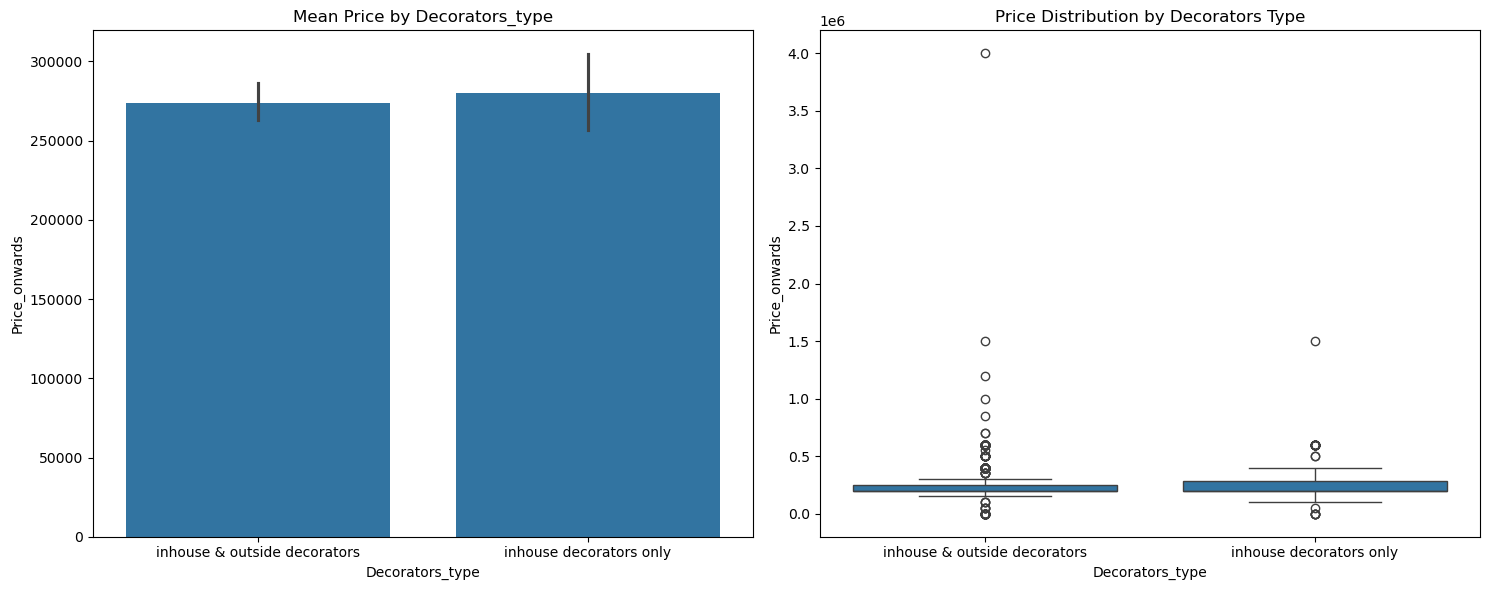

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.barplot(x='Decorators_type', y='Price_onwards', data=df, ax=axes[0])
axes[0].set_title("Mean Price by Decorators_type")
# axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Decorators_type', y='Price_onwards', data=df, ax=axes[1])
axes[1].set_title('Price Distribution by Decorators Type')
# axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Average Price by Decorator Type
What the chart shows

Bar chart comparing average ‘Price_onwards’ across decorator types.

`Interpretation`

Some decorator types (e.g., Premium/Designer etc.) have noticeably higher average pricing.

This indicates that different service categories operate in different pricing segments.

Higher price may reflect:

Premium services

Advanced decoration styles

Better skilled teams

Sentence to speak

“As we can see, pricing significantly varies between decorator categories. Premium services charge the most, suggesting a market segment ready to pay for higher quality.”

## 2. Decorators Type vs Ratings (Bar Plot)

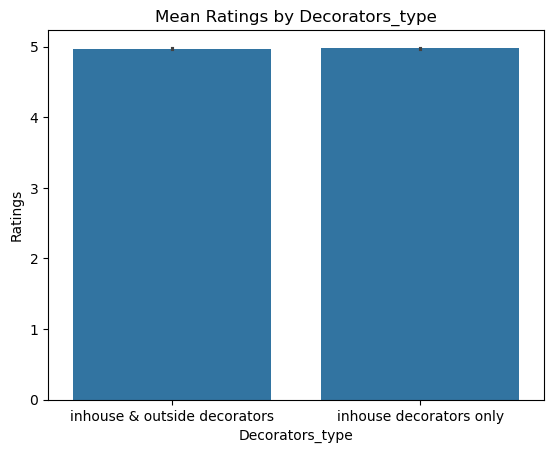

In [146]:
sns.barplot(x='Decorators_type', y='Ratings', data=df)
plt.title("Mean Ratings by Decorators_type")
plt.show()

## 3. Reviews vs Ratings (Scatter Plot)

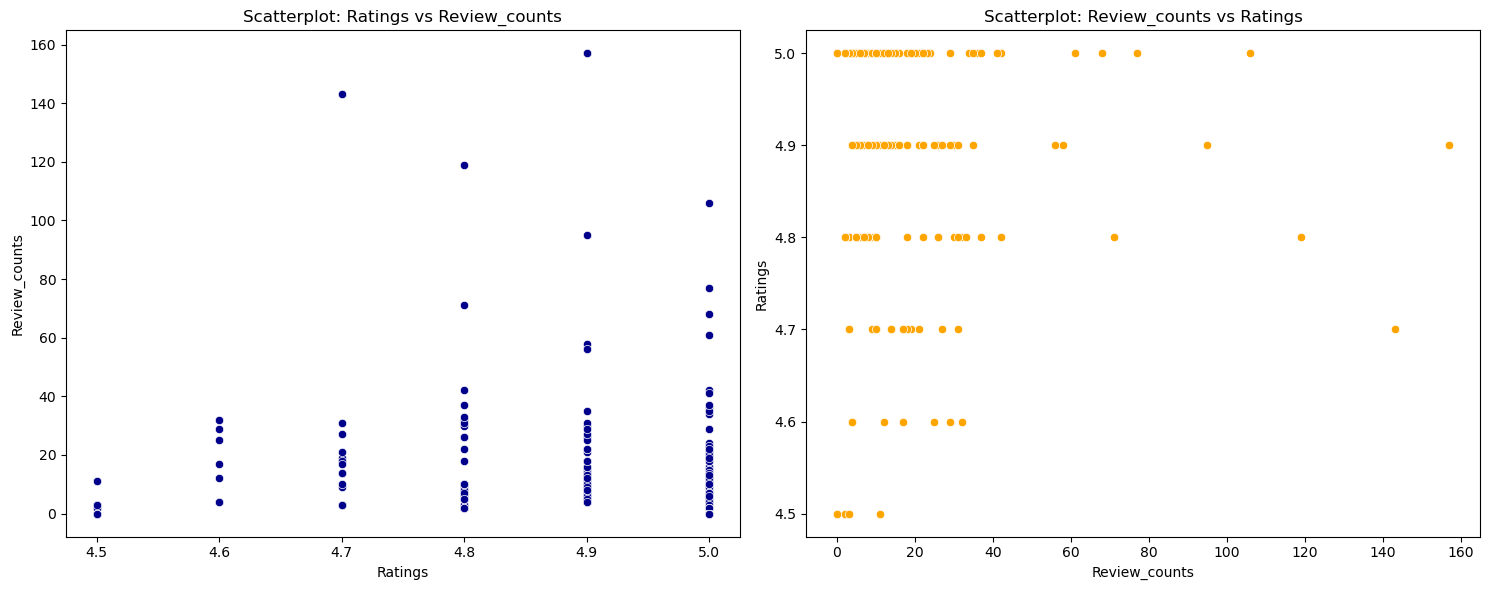

In [6]:
fig, axes= plt.subplots(1,2, figsize=(15,6))

sns.scatterplot(x=df['Ratings'], y=df['Review_counts'], ax=axes[0], color='DarkBlue')
axes[0].set_title("Scatterplot: Ratings vs Review_counts")

sns.scatterplot(x=df['Review_counts'], y=df['Ratings'], ax=axes[1], color='Orange')
axes[1].set_title("Scatterplot: Review_counts vs Ratings")

plt.savefig('Reviews vs Ratings.png')
plt.tight_layout()
plt.show()

#### Reviews vs Ratings (Scatter Plot)
What the chart shows

Relationship between:

Customer volume (Reviews)

Quality perception (Ratings)

`Interpretation`

Vendors with more reviews often have higher ratings.

Shows quality and popularity reinforce each other.

Also means:

The market trusts popular planners

Word-of-mouth helps top performers grow

How to transition from the previous slide

“After understanding the rating differences, we check whether popularity aligns with quality. The scatter plot confirms that more popular planners generally also have better ratings.”

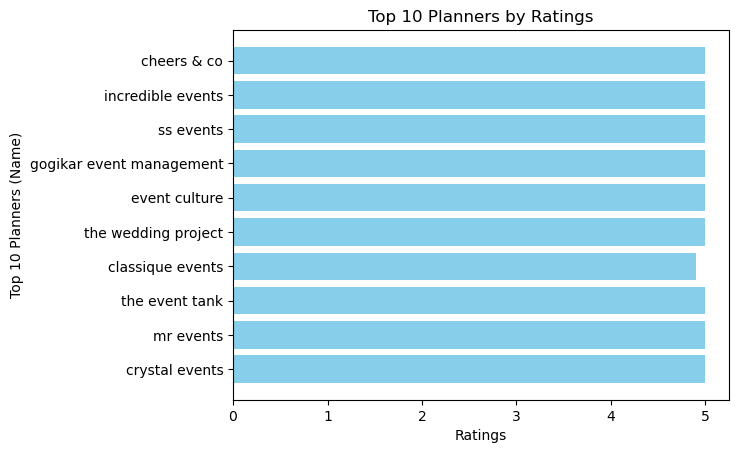

In [7]:
# 4. Top 10 Planners by Ratings (Horizontal Bar Plot)

top10_names = df['Name'].value_counts().head(10).index
df_top10 = df[df['Name'].isin(top10_names)]

plt.barh(df_top10['Name'], df_top10['Ratings'], color='skyblue')

plt.xlabel("Ratings")
plt.ylabel("Top 10 Planners (Name)")
plt.title("Top 10 Planners by Ratings")

plt.show()

#### Top 10 Planners by Ratings
What the chart shows

A leaderboard of the highest-rated planners.

`Interpretation`

Highlights the best performers in the market.

Useful for:

Customer recommendations

Business benchmarking

Shows variance in ratings even among the top 10.

What to say

“These are the market leaders in terms of customer satisfaction. Businesses can analyze their strategies to benchmark and improve their services.”

##  Price vs Ratings, Price vs Review_counts, Ratings vs Review_counts

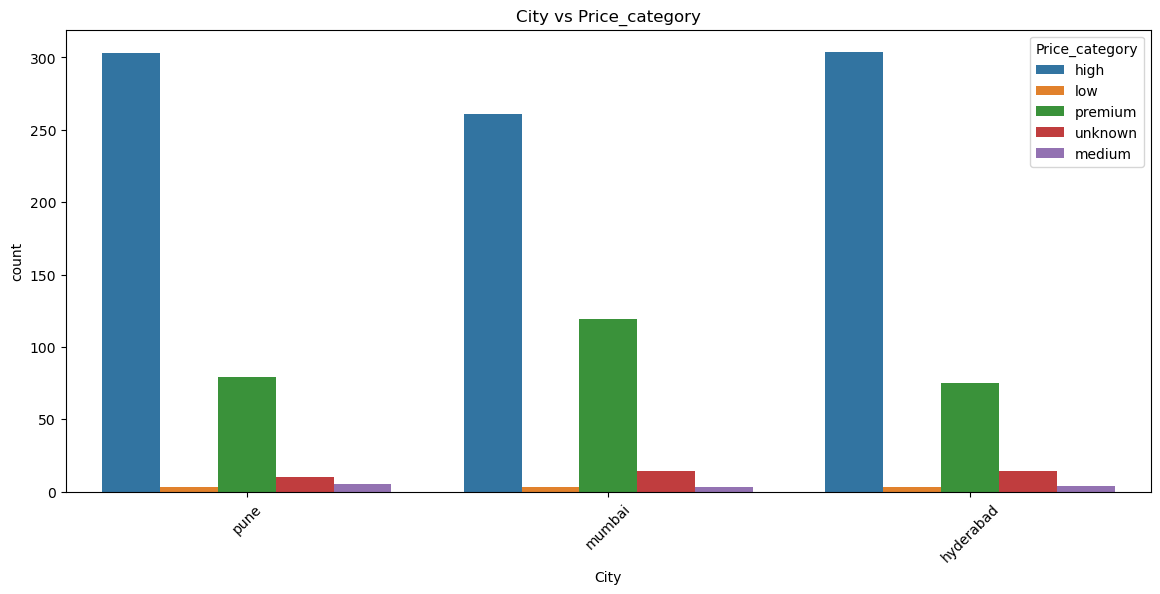

In [55]:
# City vs Price_category

plt.figure(figsize=(14,6))
sns.countplot(x='City', hue='Price_category', data=df)
plt.title("City vs Price_category")
plt.xticks(rotation=45)
plt.show()


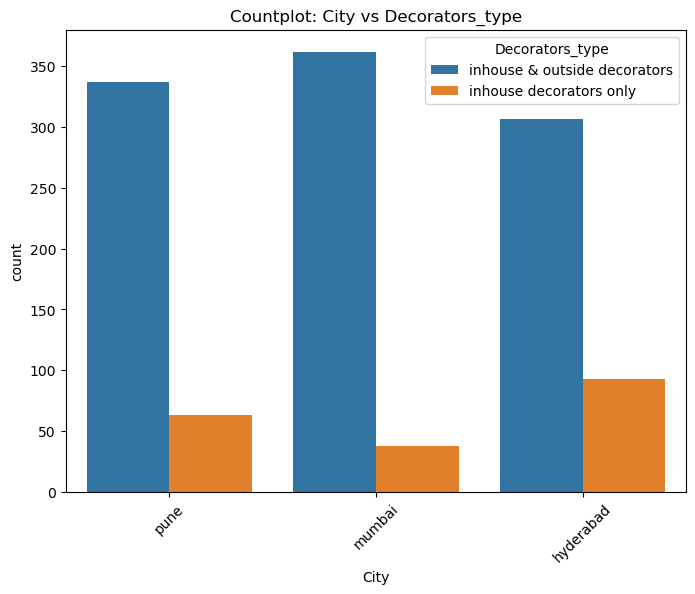

In [4]:
# City vs Decorators_type

plt.figure(figsize=(8,6))
sns.countplot(x='City', hue='Decorators_type', data=df)
plt.title("Countplot: City vs Decorators_type")
plt.xticks(rotation=45)

plt.savefig('City vs Decorators_type.png')
plt.show()

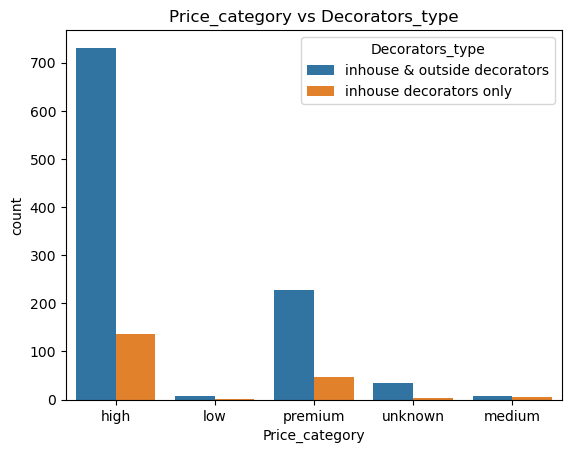

In [62]:
# Price_category vs Decorators_type

sns.countplot(x='Price_category', hue='Decorators_type', data=df)
plt.title("Price_category vs Decorators_type")
# plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Mean Review_counts by City')

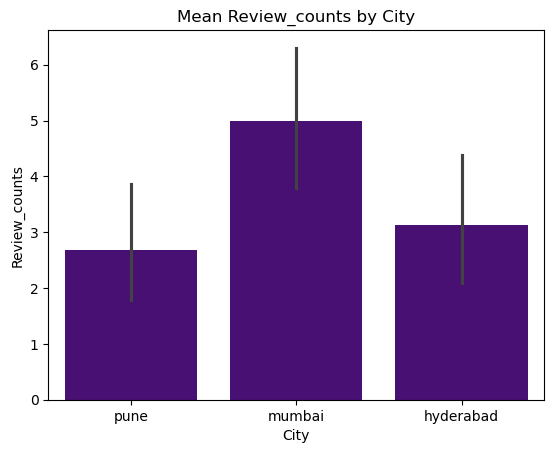

In [69]:
sns.barplot(x='City', y='Review_counts', data=df, color='Indigo')
plt.title("Mean Review_counts by City")

Text(0.5, 1.0, 'Mean Price by City')

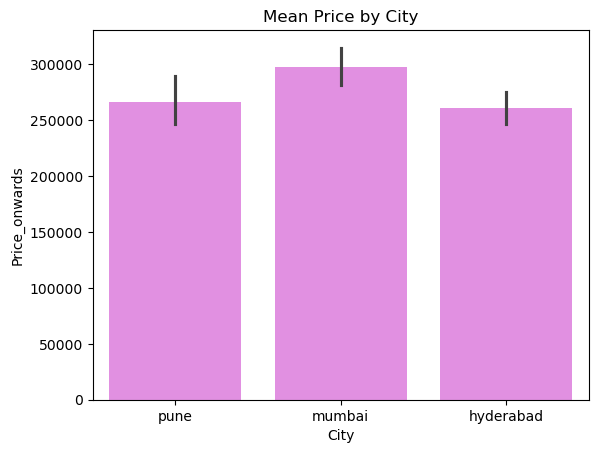

In [68]:
sns.barplot(x='City', y='Price_onwards', data=df, color='violet')
plt.title("Mean Price by City")

# Multivariate Analysis

## 1. Grouped barplot

In [6]:
# Name/Planner, City & Ratings

# Filter rows where Ratings are between 4.8 and 5.0
high_rated = df[(df['Ratings'] >= 4.5) & (df['Ratings'] <= 5.0)]

# Select only Name, City, Ratings
result = high_rated[['Name', 'City', 'Ratings']]

result

,Name,City,Ratings
0,tatva event planner,pune,5.0
1,prayukti events,pune,4.7
2,urban events,pune,4.9
3,gātha - a tale of events,pune,4.9
4,happy wedz,pune,5.0
...,...,...,...
1195,str events and wedding planners,hyderabad,5.0
1196,rs media house,hyderabad,5.0
1197,sri laxmi balaji event planner,hyderabad,5.0
1198,brindha events,hyderabad,5.0


In [7]:
top10 = df.sort_values(by='Name', ascending=False).head(10)

print(top10[['Name','City','Ratings']])


                                 Name       City  Ratings
1142                        zk events  hyderabad      5.0
202    ziyon events - wedding planner       pune      5.0
685                     zion concepts     mumbai      5.0
590         ziel events & experiences     mumbai      5.0
508   zahra event and wedding planner     mumbai      5.0
1165                     yukta events  hyderabad      5.0
1083                  yugantha events  hyderabad      5.0
80                        yr creation       pune      5.0
581                yolo entertainment     mumbai      5.0
603                      yes99 events     mumbai      5.0


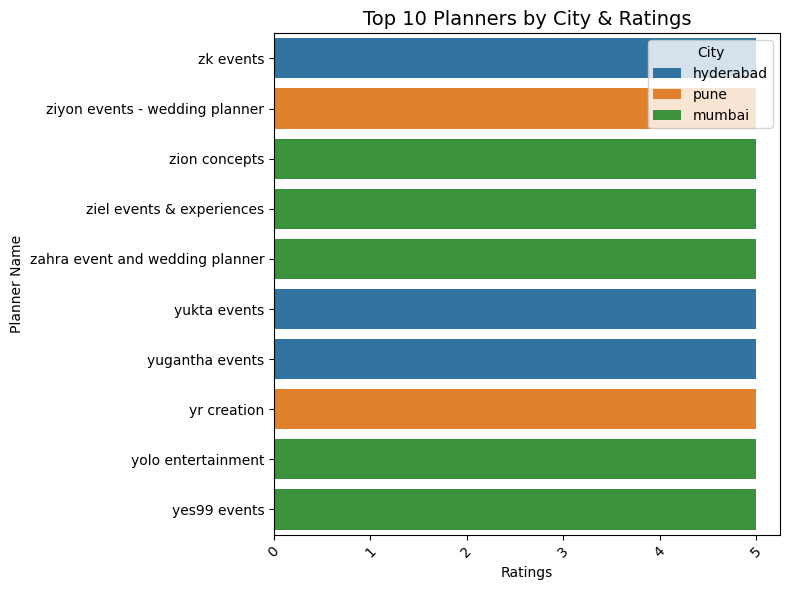

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.barplot(data=top10, x='Ratings', y='Name', hue='City')

plt.xticks(rotation=45)
plt.title("Top 10 Planners by City & Ratings", fontsize=14)
plt.xlabel("Ratings")
plt.ylabel("Planner Name")
plt.legend(title="City")

# plt.savefig('Reviews vs Ratings.png')
plt.savefig('Multivariate plot.png')
plt.tight_layout()
plt.show()


In [129]:
# Name, City, REVIEW COUNTS

high_rated = df[(df['Review_counts'] >= 30) ]

# Select only Name, City, Ratings
result = high_rated[['Name', 'City', 'Review_counts']]

result

,Name,City,Review_counts
3,gātha - a tale of events,pune,58
4,happy wedz,pune,106
5,aesthetic weddings & events,pune,42
6,the perfect knock events,pune,119
17,aishal,pune,37
47,q events,pune,34
63,varad productions,pune,32
401,panaash entertainment,mumbai,56
402,classique events,mumbai,157
405,knotty relations,mumbai,30


In [130]:
top10 = df.sort_values(by='Name', ascending=False).head(10)

print(top10[['Name','City','Review_counts']])

                                 Name       City  Review_counts
1142                        zk events  hyderabad              0
202    ziyon events - wedding planner       pune              0
685                     zion concepts     mumbai              0
590         ziel events & experiences     mumbai              2
508   zahra event and wedding planner     mumbai              0
1165                     yukta events  hyderabad              0
1083                  yugantha events  hyderabad              0
80                        yr creation       pune              0
581                yolo entertainment     mumbai              6
603                      yes99 events     mumbai              4


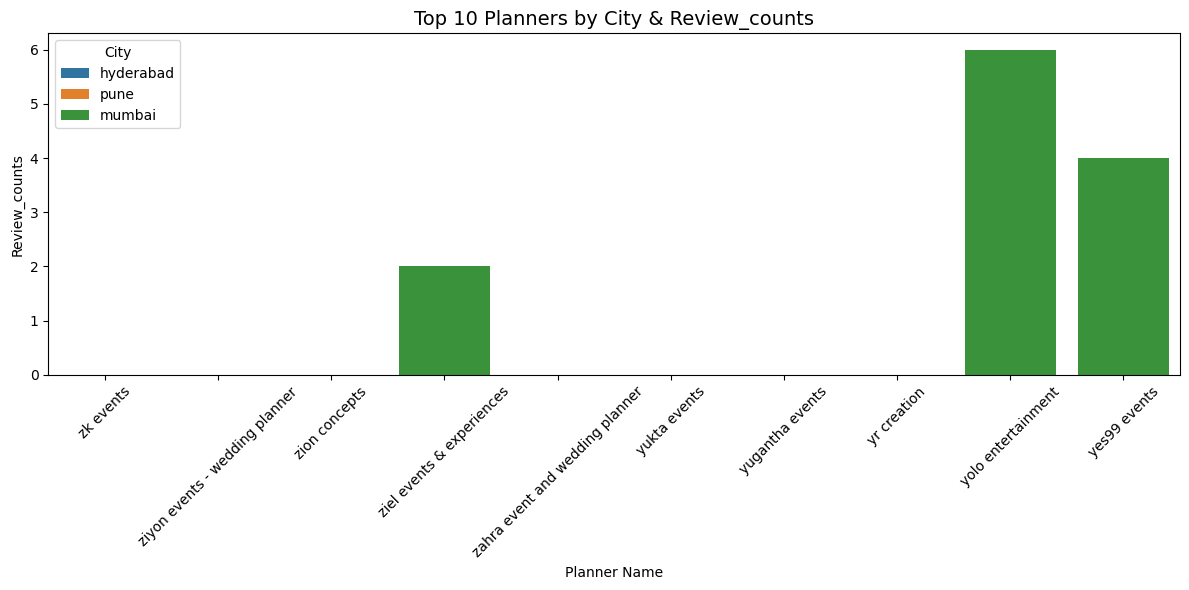

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

sns.barplot(data=top10, x='Name', y='Review_counts', hue='City')

plt.xticks(rotation=45)
plt.title("Top 10 Planners by City & Review_counts", fontsize=14)
plt.xlabel("Planner Name")
plt.ylabel("Review_counts")
plt.legend(title="City")
plt.tight_layout()
plt.show()
